#                                    Logistic Regression Using Tensorflow

### Importing the necessary packages

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
logs_path = '/tmp/tensorflow_summary/logs'
num_iterations = 1200
steps_per_print = 100
tf.logging.set_verbosity(tf.logging.INFO)
#np.random.seed(42)

### Importing The data

In [3]:
data = np.transpose(np.loadtxt(r"C:\Users\naoggu\Downloads\machine-learning-programming-assignments-coursera-andrew-ng-master\machine-learning-ex2\ex2\ex2data1.txt", delimiter=','))
print("Shape of data : ", data.shape)
data_x = np.hstack((np.ones((data.shape[1],1)), 
                    (data[0]/np.max(data[0])).reshape(data.shape[1],1), 
                    (data[1]/np.max(data[1])).reshape(data.shape[1],1)))
data_y = data[2].reshape(data.shape[1],1)
print("Input Sample : ",data_x[:5])
print("output Sample : ",data_y[:5])

Shape of data :  (3, 100)
Input Sample :  [[1.         0.34683364 0.78916899]
 [1.         0.30338937 0.44396933]
 [1.         0.35909224 0.73735829]
 [1.         0.60286378 0.87295484]
 [1.         0.79169019 0.76205933]]
output Sample :  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]]


### Shuffling and Partitioning the data into train and test sets

In [4]:
order = np.random.permutation(len(data_x))
portion = 30
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]
print("No of Training Sample : ", train_x.shape)
print(np.unique(train_y, return_counts = True))
print(np.unique(test_y, return_counts = True))

No of Training Sample :  (70, 3)
(array([0., 1.]), array([31, 39], dtype=int64))
(array([0., 1.]), array([ 9, 21], dtype=int64))


In [5]:
rand_ind = np.random.choice(train_x.shape[0],train_x.shape[1])
x = train_x[rand_ind]
y = train_y[rand_ind]
print(x.shape)
w = np.array(np.dot(np.linalg.inv(x),y))
print(w)

(3, 3)
[[-1.6458864 ]
 [ 0.99580011]
 [ 2.68349819]]


### Defining the tensorflow graph.

In [6]:
input_ = tf.placeholder("float64",shape=(1,data.shape[0]), name='input')
output = tf.placeholder("float64",shape=(1,1), name='output')
weights = tf.get_variable(dtype = "float64", initializer = tf.truncated_normal_initializer(),shape=(data.shape[0],1), name='Weights')
lr = tf.constant(0.01,"float64", name='Learning_rate')

with tf.name_scope('Model'):
    y_pred = tf.sigmoid(tf.matmul(input_, weights))
with tf.name_scope('Loss'):
    loss = -(output*tf.log(y_pred)+(1-output)*tf.log(1-y_pred))
with tf.name_scope('opt'):
    grad = y_pred-output
with tf.name_scope('opt'):
    fin_weights = weights - lr*tf.matmul(tf.transpose(input_), grad)


### Running The tensorflow Graph

In [7]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    i = 0
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    in_weights = w
    #in_weights = weights.eval()
    print(in_weights.shape)
    test_loss = []
    train_loss = []
    while i<num_iterations:
        res_train_loss = 0
        res_test_loss = 0
        for x,y in zip(train_x,train_y):
            #print(" Starting Iteration ",i," Sample ",x," Output ",y)
            in_weights = sess.run(fin_weights,feed_dict = {input_:[x], output:[y], weights:in_weights})
            #print(" Progressing Iteration ",i," Sample ",x," Output ",y)
            res_train_loss +=  loss.eval(feed_dict = {input_:[x], output:[y], weights:in_weights})/train_x.shape[0]
            #print(" Ending Iteration ",i," Sample ",x," Output ",y)
        test_pred=[]
        for x,y in zip(test_x,test_y):
            test_pred.append(1 if( sess.run(y_pred, feed_dict = {input_:[x], weights:in_weights}) ).reshape(1,) > 0.5 else 0)
            res_test_loss += loss.eval(feed_dict = {input_:[x], output:[y], weights:in_weights})/test_x.shape[0]
        i = i+1
        if (i%steps_per_print == 0):
            print("Loss at iteration ", i, " : ", res_train_loss)
            print("Average Loss on test data: ",res_test_loss)
        test_loss.append(res_test_loss)
        train_loss.append(res_train_loss)
    print("Final Weights : ", in_weights)
    #final_weights = in_weights
print("Run the command line:\n" \
          "--> tensorboard --logdir=/tmp/tensorflow_summary " \
          "\nThen open http://0.0.0.0:6006/ into your web browser")

(3, 1)
Loss at iteration  100  :  [[0.4603082]]
Average Loss on test data:  [[0.41280269]]
Loss at iteration  200  :  [[0.40767539]]
Average Loss on test data:  [[0.36951692]]
Loss at iteration  300  :  [[0.37437849]]
Average Loss on test data:  [[0.33952714]]
Loss at iteration  400  :  [[0.35106]]
Average Loss on test data:  [[0.31729981]]
Loss at iteration  500  :  [[0.33369165]]
Average Loss on test data:  [[0.300125]]
Loss at iteration  600  :  [[0.32020812]]
Average Loss on test data:  [[0.28645373]]
Loss at iteration  700  :  [[0.30941834]]
Average Loss on test data:  [[0.27531584]]
Loss at iteration  800  :  [[0.3005791]]
Average Loss on test data:  [[0.26606812]]
Loss at iteration  900  :  [[0.29319999]]
Average Loss on test data:  [[0.25826693]]
Loss at iteration  1000  :  [[0.28694353]]
Average Loss on test data:  [[0.25159676]]
Loss at iteration  1100  :  [[0.28156958]]
Average Loss on test data:  [[0.24582748]]
Loss at iteration  1200  :  [[0.27690245]]
Average Loss on test

### Metrics

In [10]:
print("Average Loss on test data: ",res_test_loss)
tp = 0
fp = 0
tn = 0
fn = 0
for x,y in zip(test_pred, test_y):
    #print("Predicted value : ", x, "Actual value : ", y,"Predicted Correctly" if x==y else "Predicted Wrongly")
    if y==1:
        if x==y:
            tp += 1
        else:
            fp += 1
    else:
        if x==y:
            tn += 1
        else:
            fn += 1
print("True\tPositives\t:\t",tp,"\nFalse\tPositives\t:\t",fp,"\nFalse\tNegatives\t:\t",fn,"\nTrue\tNegatives\t:\t",tn)
print("Accuracy (tp+tn)/(fp+fn+tp+tn) : ",(tp+tn)/(fp+fn+tp+tn))
    

Average Loss on test data:  [[0.24078749]]
True	Positives	:	 19 
False	Positives	:	 2 
False	Negatives	:	 0 
True	Negatives	:	 9
Accuracy (tp+tn)/(fp+fn+tp+tn) :  0.9333333333333333


### Plotting Train and Test Loss

1200 1200


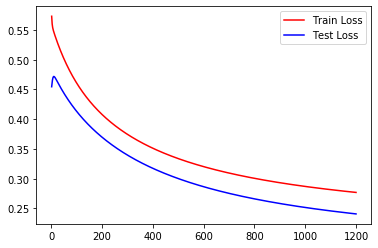

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

print(len(train_loss), len(test_loss))
plt.plot(range(1,num_iterations+1,1),np.array(train_loss).reshape(num_iterations,1),c='r')
#plt.legend([])
plt.plot(range(1,num_iterations+1,1),np.array(test_loss).reshape(num_iterations,1),c='b')
plt.legend(['Train Loss', 'Test Loss'])